In [14]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download('sobhanmoosavi/us-accidents')

print("Dataset downloaded to:", path)

Dataset downloaded to: C:\Users\Vansh\.cache\kagglehub\datasets\sobhanmoosavi\us-accidents\versions\13


In [15]:
import os
print(os.listdir(path))

['US_Accidents_March23.csv']


In [16]:
file_path = path + "/US_Accidents_March23.csv"

df = pd.read_csv(file_path, nrows=500000)

df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            500000 non-null  object 
 11  Street                 500000 non-null  object 
 12  City                   499978 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [18]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,0.0,0.0,500000.000000,492750.000000,62359.000000,492085.000000,494261.000000,489461.000000,410960.000000,51946.000000
mean,2.374690,35.929426,-97.590381,NaN,NaN,0.065294,64.668092,30.422478,64.529433,30.004807,9.227911,8.913004,0.068995
std,0.486796,5.032482,18.280944,NaN,NaN,0.782881,16.877594,15.796170,21.387837,0.242343,2.140192,5.414922,0.562091
min,1.000000,25.433098,-123.813927,NaN,NaN,0.000000,-77.800000,-29.300000,4.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,32.811352,-118.096634,NaN,NaN,0.000000,55.000000,21.900000,49.000000,29.900000,10.000000,5.800000,0.000000
50%,2.000000,34.247250,-95.543968,NaN,NaN,0.010000,66.200000,31.000000,66.000000,30.000000,10.000000,8.100000,0.010000
75%,3.000000,40.134354,-81.565750,NaN,NaN,0.010000,77.000000,38.100000,82.000000,30.110000,10.000000,11.500000,0.040000
max,4.000000,48.199970,-70.571518,NaN,NaN,90.370003,161.600000,111.000000,100.000000,33.040000,111.000000,822.800000,10.140000


In [19]:
df.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  500000
End_Lng                  500000
Distance(mi)                  0
Description                   0
Street                        0
City                         22
County                        0
State                         0
Zipcode                      58
Country                       0
Timezone                     58
Airport_Code                 60
Weather_Timestamp          4115
Temperature(F)             7250
Wind_Chill(F)            437641
Humidity(%)                7915
Pressure(in)               5739
Visibility(mi)            10539
Wind_Direction             4147
Wind_Speed(mph)           89040
Precipitation(in)        448054
Weather_Condition         10185
Amenity                       0
Bump                          0
Crossing

In [20]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour

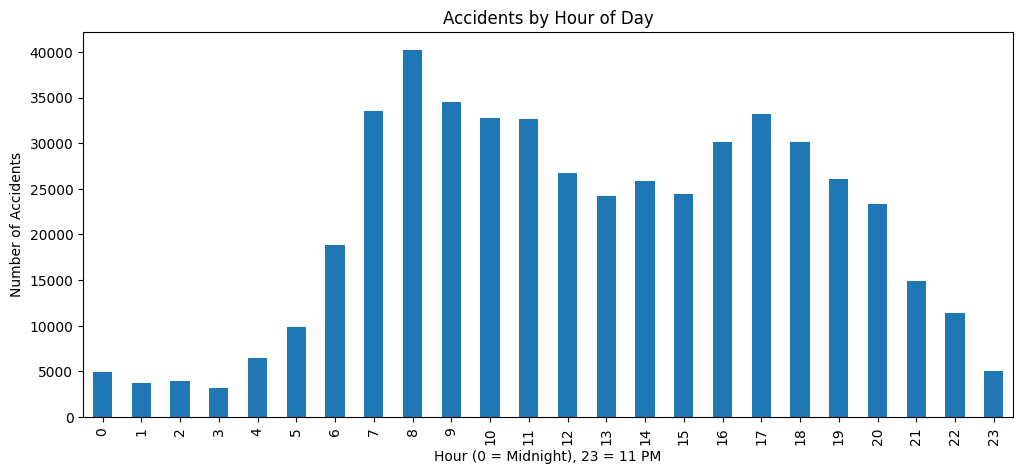

In [21]:
import matplotlib.pyplot as plt

df['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5))
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour (0 = Midnight), 23 = 11 PM')
plt.ylabel('Number of Accidents')
plt.show()

In [22]:
df['Weather_Condition'].value_counts().head(20)

Weather_Condition
Clear                           205029
Overcast                         79031
Mostly Cloudy                    66165
Partly Cloudy                    46908
Scattered Clouds                 45714
Light Rain                       20500
Haze                              5884
Rain                              4248
Light Snow                        3962
Fair                              2456
Fog                               1711
Heavy Rain                        1326
Light Drizzle                     1130
Light Thunderstorms and Rain      1023
Thunderstorm                       838
Cloudy                             480
Thunderstorms and Rain             451
Heavy Thunderstorms and Rain       414
Snow                               404
Smoke                              335
Name: count, dtype: int64

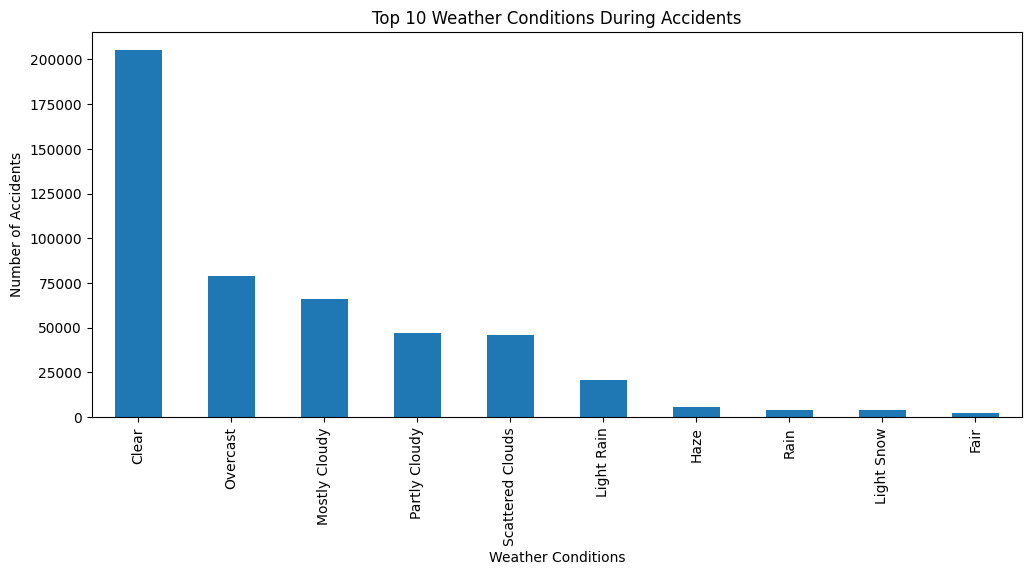

In [23]:
df['Weather_Condition'].value_counts().head(10).plot(kind='bar', figsize=(12, 5))
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.show()

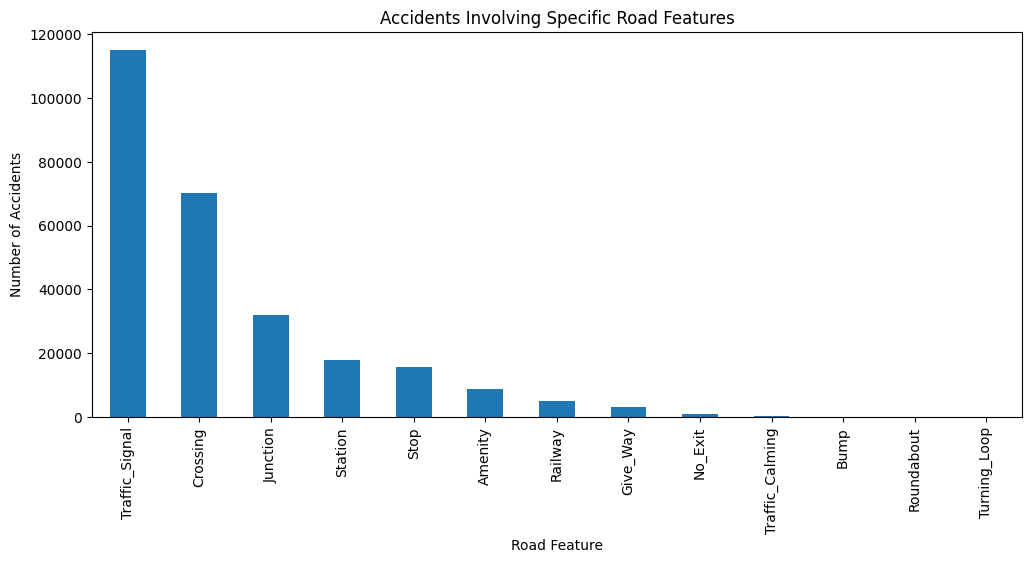

In [24]:
road_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
                'Traffic_Signal', 'Turning_Loop']

df[road_columns].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
plt.title('Accidents Involving Specific Road Features')
plt.xlabel('Road Feature')
plt.ylabel('Number of Accidents')
plt.show()

In [25]:
import folium

sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(2000)

m = folium.Map(location=[sample_df['Start_Lat'].mean(), sample_df['Start_Lng'].mean()], zoom_start=5)

for _, row in sample_df.iterrows():
  folium.CircleMarker(
      location=[row['Start_Lat'], row['Start_Lng']],
      radius=1,
      color='red',
      fill=True
  ).add_to(m)

m

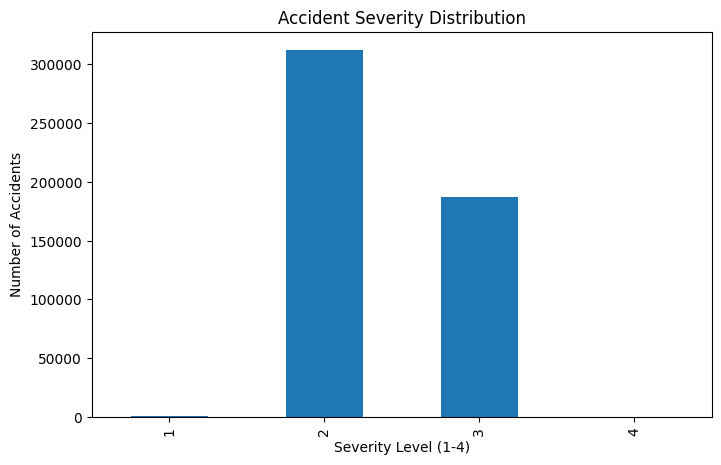

In [26]:
df['Severity'].value_counts().sort_index().plot(kind='bar', figsize=(8, 5))
plt.title('Accident Severity Distribution')
plt.xlabel('Severity Level (1-4)')
plt.ylabel('Number of Accidents')
plt.show()